# Mapping School Locations Script

## Import Packages

In [1]:
import arcpy
from arcpy import env
from arcpy.sa import *
from arcpy.ia import *
import arcgis
from arcgis.gis import GIS
gis = GIS("home")
from arcgis.features import SpatialDataFrame
spatial = SpatialDataFrame

In [2]:
# Set Data Directories
data_dir = "G:/Work/SDSN/Data/SDG 4"
iiep_worldpop_dir = "G:/Work/SDSN/Data/SDG 4/IIEP_WorldPop/school_age_population"
# Set Output Locations
output_dir = "G:/Work/SDSN/Data/SDG 4/School Locations Temp"

# Input Data

## IIEP/WorldPop School Aged Population Data

In [3]:
# Set Directory for School Aged Population Folder
arcpy.env.workspace = iiep_worldpop_dir
arcpy.env.workspace

'G:/Work/SDSN/Data/SDG 4/IIEP_WorldPop/school_age_population'

In [4]:
# Create a list of Country Codes as Identified by the country-specific subfolders within the population data folder
country_list = ["AGO","BDI","BEN","BFA","BWA","CAF","CIV","CMR","COD","COG","COM","CPV","DJI","DZA","EGY","ERI","ES_CN","ESP","ETH","GAB","GHA","GIN","GMB","GNB","GNQ","KEN","LBR","LBY","LSO","MAR","MDG","MLI","MOZ","MRT","MUS","MWI","MYT","NAM","NER","NGA","PRT","PT_30","REU","RWA","SDN","SEN","SLE","SOM","SSD","STP","SWZ","SYC","TCD","TGO","TUN","TZA","UGA","YEM","ZAF","ZMB","ZWE"]

### Parse through country subfolders for sex specific datasets to merge into continent-wide images, both primary and secondary aged students. Result: 6 datasets, 3 per student age group

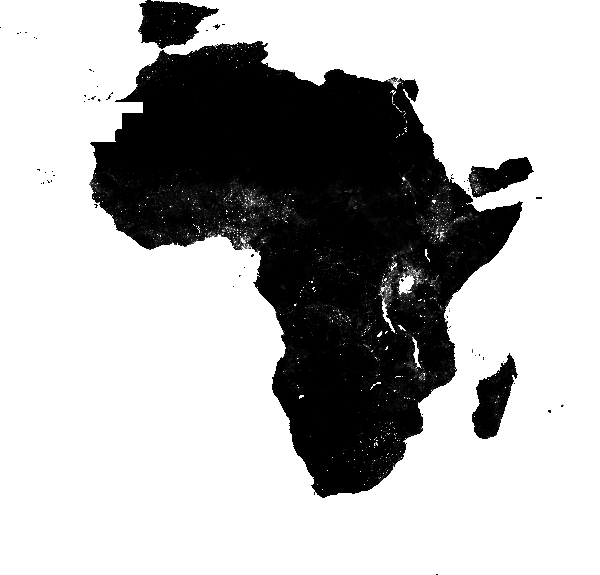

In [5]:
blank = []
previous = []
for country in country_list:
    ## Create File Name for Iteration
    cc = country
    file = "_F_M_PRIMARY_2020_1km.tif"
    slash ="/"
    image = cc+slash+cc+file
    raster = Raster(image)
    ## Merge File into Raster, conditional
    if previous == blank:
        previous = country
        af_1 = raster
    else:
        af_1 = Merge([af_1,raster])
af_1

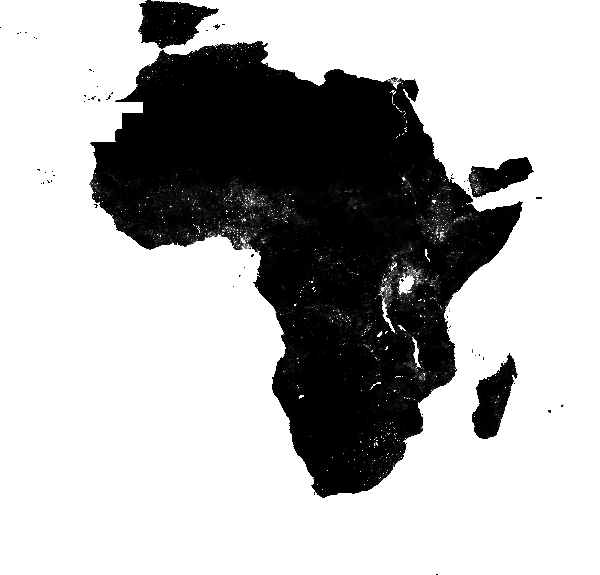

In [6]:
blank = []
previous = []
for country in country_list:
    ## Create File Name for Iteration
    cc = country
    file = "_M_PRIMARY_2020_1km.tif"
    slash ="/"
    image = cc+slash+cc+file
    raster = Raster(image)
    ## Merge File into Raster, conditional
    if previous == blank:
        previous = country
        af_1_m = raster
    else:
        af_1_m = Merge([af_1_m,raster])
af_1_m

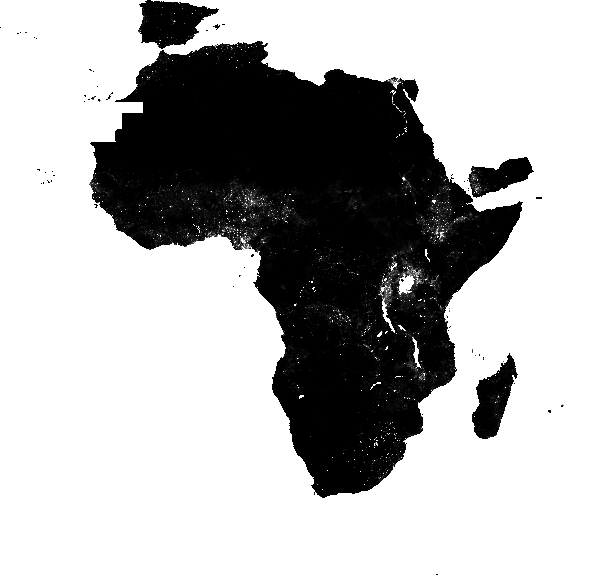

In [7]:
blank = []
previous = []
for country in country_list:
    ## Create File Name for Iteration
    cc = country
    file = "_F_PRIMARY_2020_1km.tif"
    slash ="/"
    image = cc+slash+cc+file
    raster = Raster(image)
    ## Merge File into Raster, conditional
    if previous == blank:
        previous = country
        af_1_f = raster
    else:
        af_1_f = Merge([af_1_f,raster])
af_1_f

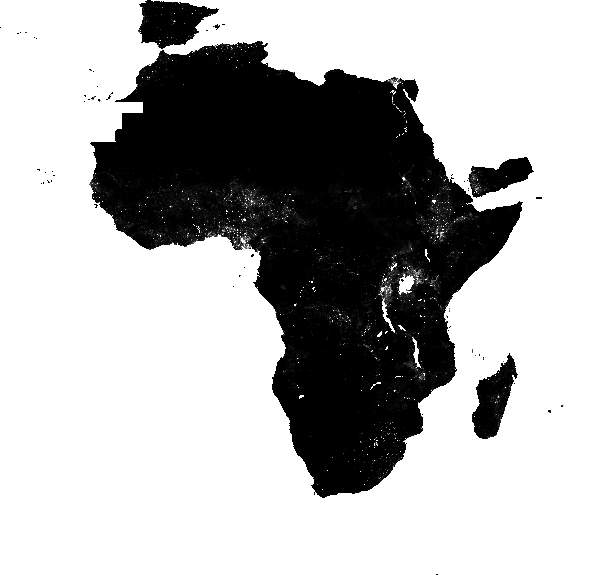

In [8]:
blank = []
previous = []
for country in country_list:
    ## Create File Name for Iteration
    cc = country
    file = "_F_M_SECONDARY_2020_1km.tif"
    slash ="/"
    image = cc+slash+cc+file
    raster = Raster(image)
    ## Merge File into Raster, conditional
    if previous == blank:
        previous = country
        af_2 = raster
    else:
        af_2 = Merge([af_2,raster])
af_2

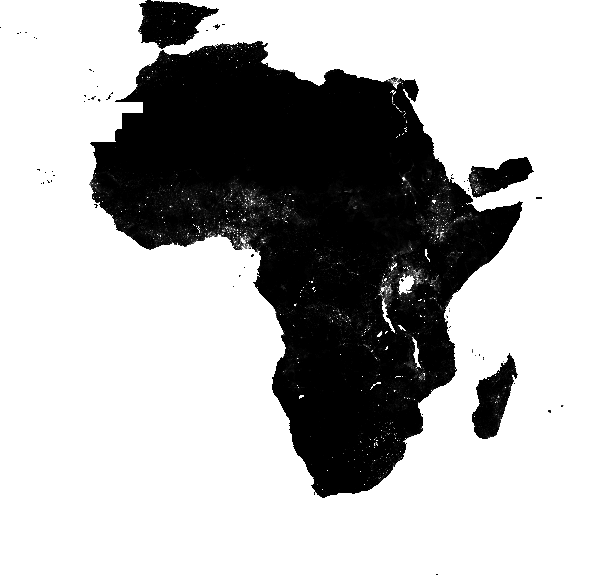

In [9]:
blank = []
previous = []
for country in country_list:
    ## Create File Name for Iteration
    cc = country
    file = "_M_SECONDARY_2020_1km.tif"
    slash ="/"
    image = cc+slash+cc+file
    raster = Raster(image)
    ## Merge File into Raster, conditional
    if previous == blank:
        previous = country
        af_2_m = raster
    else:
        af_2_m = Merge([af_2_m,raster])
af_2_m

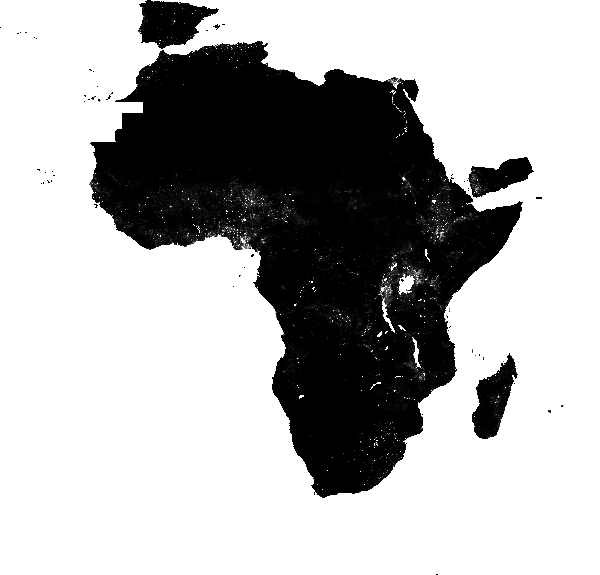

In [10]:
blank = []
previous = []
for country in country_list:
    ## Create File Name for Iteration
    cc = country
    file = "_F_SECONDARY_2020_1km.tif"
    slash ="/"
    image = cc+slash+cc+file
    raster = Raster(image)
    ## Merge File into Raster, conditional
    if previous == blank:
        previous = country
        af_2_f = raster
    else:
        af_2_f = Merge([af_2_f,raster])
af_2_f

## Walking-time Cost Raster

In [11]:
# Set Directory for walking time folder
arcpy.env.workspace = data_dir
arcpy.env.workspace

'G:/Work/SDSN/Data/SDG 4'

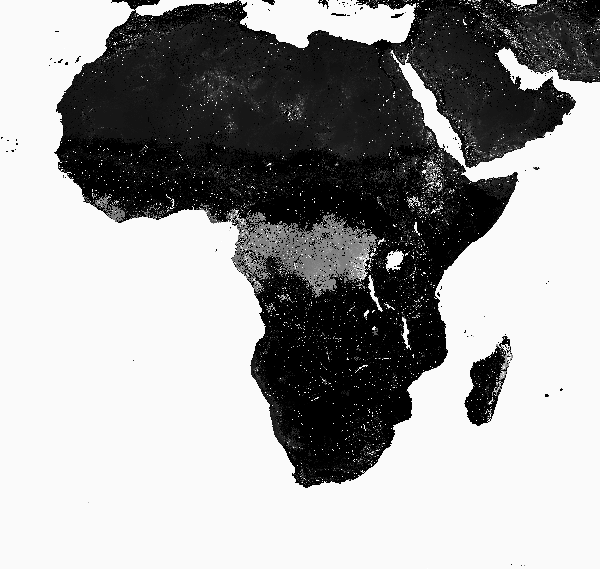

In [12]:
walk_af = Raster("walking_time_2019_af.tif")
walk_af

## OSM School Locations

In [13]:
# Item Added From Toolbar
# Title: OpenStreetMap Buildings for Africa | Type: Feature Service | Owner: smoore2_osm
item = gis.content.get("bb86721588ea49b6b44b10b7d5d2b0b1")
feature_layer=item.layers[0]
feature_layer

<FeatureLayer url:"https://services-eu1.arcgis.com/zci5bUiJ8olAal7N/arcgis/rest/services/OSM_AF_Buildings/FeatureServer/0">

In [14]:
# query for only buildings listed as schools
query_statement="building='school'"
schools=feature_layer.query(where=query_statement)
schools

<FeatureSet> 41313 features

In [15]:
# Convert to Spatial Data Frame for conversion to ArcPy Layer Object
schools_sdf = schools.sdf
schools_sdf

,objectid,osm_id2,addr_city,addr_conscriptionnumber,addr_country,addr_district,addr_full,addr_housename,addr_housenumber,addr_interpolation,...,name_en,ref,ref_bag,roof_shape,shop,source_transform,source_date,start_date,wall,SHAPE
0,73434,437262207,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[3851465.7951, 1704.03429999948], ..."
1,157513,433100600,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[750633.782900002, 29397.254999999..."
2,157515,917135914,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[750665.542399999, 29406.093899998..."
3,158093,669396653,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[743584.197900001, 33088.297400001..."
4,159286,412965362,None,None,None,None,None,None,None,None,...,None,None,None,hipped,None,None,None,None,None,"{""rings"": [[[741987.085999999, 36632.106199998..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41308,59146452,1050309105,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[5273434.92173034, -2119984.265172..."
41309,59146456,1050309103,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[5273448.80327085, -2119982.243733..."
41310,59147421,689353142,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[5273941.01353134, -2302341.412868..."
41311,59147422,689353141,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[5273903.48773099, -2302382.193322..."


In [16]:
# Select only columns we need for distance accumulation
columns = ['objectid', 'osm_id2', 'SHAPE']
# Save as shp file
output_schools_shp = output_dir + "/school_locations.shp"
schools_sdf[columns].spatial.to_featureclass(output_schools_shp, overwrite = True)
# Import shp as ArcPy Layer object
schools_loc = arcpy.MakeFeatureLayer_management("School Locations Temp/school_locations.shp")
schools_loc

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


<Result 'school_locations_Layer'>

# Create Isochrone Raster from School Locations and Cost Raster

## Distance Accumulation

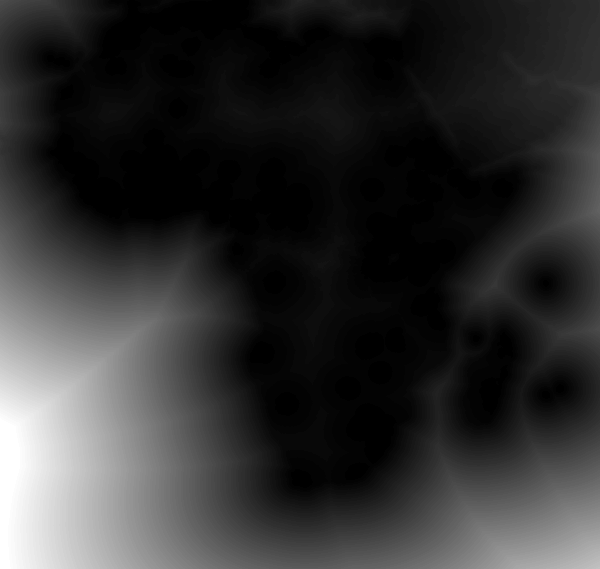

In [17]:
# Run Distance Accumulation tool, select GEODESIC due to the large geographic extent of our data
outDistAcc = DistanceAccumulation(
    in_source_data = schools_loc,
    in_cost_raster = walk_af,
    distance_method = "GEODESIC")
outDistAcc

## Create Isochrone Rasters